# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Путь до папки курса на Google Drive
practice_dir_path = "/content/drive/MyDrive/2025-Bokov-TimeSeriesCourse/practice/06 Chains"

os.chdir(practice_dir_path)

!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'06 Chains.ipynb'   datasets


## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

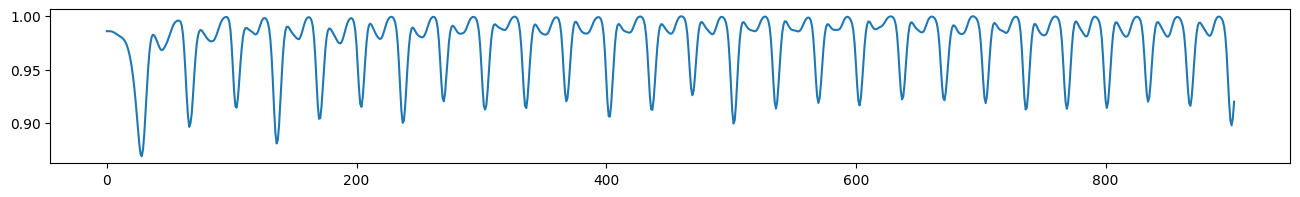

In [5]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

In [6]:
#Длина подпоследовательности
m = 50

#Считаем матричный профиль
mp = stumpy.stump(ts, m)

#Достаём левые и правые индексы матричного профиля
try:
    left_I = mp.left_I_
    right_I = mp.right_I_
except AttributeError:
    left_I = mp[:, 2]
    right_I = mp[:, 3]

#Находим множество всех цепочек и «безъякорную» (самую длинную) цепочку
all_chain_set, unanchored_chain = stumpy.allc(left_I, right_I)

print(f"Количество найденных цепочек: {len(all_chain_set)}")
print("Длины цепочек:", [len(chain) for chain in all_chain_set])

print("\nИндексы начала звеньев самой длинной цепочки (unanchored_chain):")
print(unanchored_chain)

Количество найденных цепочек: 457
Длины цепочек: [2, 1, 3, 2, 1, 1, 3, 2, 1, 1, 3, 3, 1, 2, 3, 2, 2, 2, 1, 3, 3, 4, 1, 2, 2, 2, 1, 3, 2, 1, 1, 2, 1, 2, 1, 1, 2, 3, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 3, 3, 1, 5, 3, 1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 5, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 3, 3, 2, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 5, 1, 3, 1, 1, 5, 1, 2, 1, 1, 1, 3, 1, 5, 2, 1, 1, 1, 3, 1, 1, 2, 2, 2, 2, 5, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 4, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 2, 3, 1, 3, 4, 1, 1, 1, 4, 2, 2, 4, 2, 1, 2, 1, 2, 4, 2, 1, 1, 1, 3, 4, 1, 3, 1, 1, 1, 2, 2, 6, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 2, 3, 1, 1, 4, 1, 1, 1, 3, 3, 2, 1, 2, 1, 1, 4, 4, 5, 2, 1, 2, 5, 6, 2, 1, 1, 2, 1, 5, 2, 3, 3, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 3, 2, 1, 3, 3, 2, 1, 3, 2, 2, 1, 4, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 3, 3, 5, 5, 1, 5, 3, 2, 1, 3, 1, 1, 1, 5, 2, 2, 1, 2, 2, 2, 2, 1, 3, 1, 1, 1,

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

При поиске цепочек в ряду с помощью матричного профиля были найдены несколько эволюционирующих шаблонов. Каждая цепочка — это последовательность подпоследовательностей ряда, которые похожи друг на друга, но постепенно изменяются от звена к звену.
Самая длинная цепочка показывает участок сигнала, где форма фрагментов не просто повторяется как мотив, а плавно «дрейфует» во времени (меняется амплитуда/форма, но остаётся узнаваемой). Это можно интерпретировать как медленное изменение режима работы исследуемой системы.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

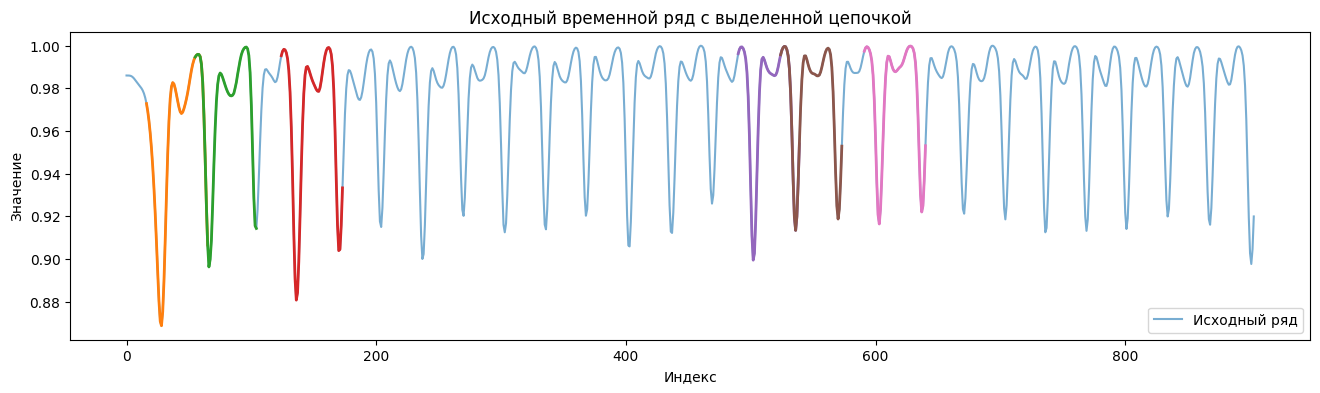

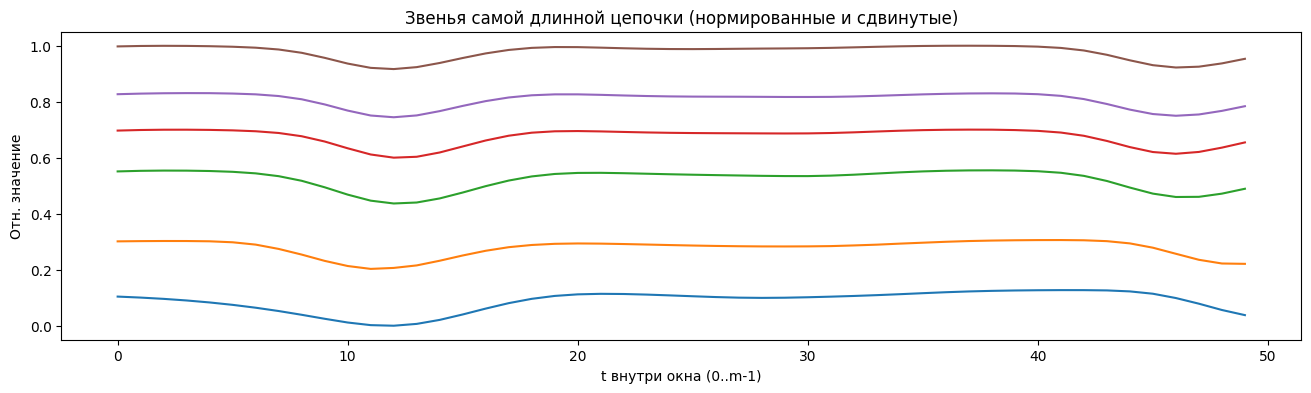

In [7]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(ts, label="Исходный ряд", alpha=0.6)

#поверх исходного ряда рисуем звенья цепочки
for start in unanchored_chain:
    segment = ts[start:start + m]
    x = np.arange(start, start + m)
    ax.plot(x, segment, linewidth=2)

ax.set_title("Исходный временной ряд с выделенной цепочкой")
ax.set_xlabel("Индекс")
ax.set_ylabel("Значение")
ax.legend()
plt.show()


#Визуализация только звеньев цепочки (каждое звено — отдельной кривой)

fig, ax = plt.subplots(figsize=(16, 4))

for i, start in enumerate(unanchored_chain):
    segment = ts[start:start + m].copy()

    #Нормируем и вертикально сдвигаем, чтобы звенья не накладывались
    segment = segment - segment.min()    #убираем смещение вниз
    offset = i * (segment.max() - segment.min() + 0.1)
    ax.plot(np.arange(m), segment + offset, label=f"Звено {i}")

ax.set_title("Звенья самой длинной цепочки (нормированные и сдвинутые)")
ax.set_xlabel("t внутри окна (0..m-1)")
ax.set_ylabel("Отн. значение")
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

На первом графике видно, где именно в исходном временном ряду находятся звенья найденной цепочки: это несколько похожих фрагментов сигнала, расположенных в разные моменты времени.
На втором графике, где показаны только звенья, видно, что их форма схожа, но между ними есть систематические отличия (изменение амплитуды, смещение, лёгкая деформация). Это подтверждает, что мы нашли именно цепочку — эволюционирующий шаблон, а не просто один и тот же мотив, который повторяется без изменений.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

In [8]:
#Формируем матрицу звеньев цепочки: каждое звено — строка длины m
segments = np.array([ts[start:start + m] for start in unanchored_chain])

#Проверим, что цепочка достаточно длинная
if segments.shape[0] < 2:
    raise ValueError("Цепочка слишком короткая, нужно как минимум два звена")

#Векторные разности между соседними звеньями: звено_{k+1} - звено_k
deltas = segments[1:] - segments[:-1]

#Средняя разность (по всем парам звеньев)
mean_delta = deltas.mean(axis=0)

#Предсказываем последнее звено по предпоследнему + среднее приращение
true_last = segments[-1]          # истинное последнее звено
prev_last = segments[-2]          # предпоследнее звено
pred_last = prev_last + mean_delta  # прогноз последнего звена

#Оценка качества прогноза
mse = mean_squared_error(true_last, pred_last)

print("Истинное последнее звено (первые 10 значений):")
print(true_last[:10])

print("\nПредсказанное последнее звено (первые 10 значений):")
print(pred_last[:10])

print(f"\nСреднеквадратичная ошибка (MSE) между истинным и предсказанным звеном: {mse:.6f}")

Истинное последнее звено (первые 10 значений):
[0.9973732  0.9989549  0.999528   0.99919736 0.99811685 0.9962082
 0.99281263 0.9863478  0.9745393  0.9565029 ]

Предсказанное последнее звено (первые 10 значений):
[1.0006384  1.00378774 1.00610957 1.00771489 1.0087205  1.00865984
 1.00721188 1.00221924 0.99097863 0.97180146]

Среднеквадратичная ошибка (MSE) между истинным и предсказанным звеном: 0.000060


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

При прогнозировании последнего звена цепочки мы использовали информацию о том, как изменяются соседние звенья цепочки друг относительно друга. Мы посчитали среднее «приращение» формы звена и добавили его к предпоследнему звену, получив прогноз последнего.
Если полученная ошибка (MSE), которую показывает программа, мала, значит эволюция шаблона достаточно регулярна, и цепочка действительно может использоваться для предсказания будущих фрагментов ряда. Если ошибка велика, это говорит о том, что в конце ряда поведение системы меняется более резко, чем это описывается простой моделью «средней разности» между звеньями.